# Audio Dataset for Image Sonification

[Ohini Kafui Toffa](mailto:ohini.kafui.toffa@umontreal.ca), Université de Montréal 
[Max Mignotte](mailto:mignotte@iro.umontreal.ca), Université de Montréal  

---

## Introduction

This is the source code of article.......
It uses the original code of [Deeplab](https://github.com/tensorflow/models/blob/master/research/deeplab/README.md)  to classify a file and save the labels/segmentatiion in files

## Depencies

This notebook requires some libraries and tools to be installed

pip install tensorflow <br>
pip install opencv-python <br>
pip install pydub <br>
pip install playsound

In [20]:
import os
from io import BytesIO
import tarfile
import tempfile
from six.moves import urllib

from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

#%tensorflow_version 1.x
import tensorflow as tf
import cv2
import numpy as np
from playsound import playsound

## Import helper methods
These methods help us perform the following tasks:
* Load the latest version of the pretrained DeepLab model
* Load the colormap from the PASCAL VOC dataset
* Adds colors to various labels, such as "pink" for people, "green" for bicycle and more
* Visualize an image, and add an overlay of colors on various regions

In [21]:
class DeepLabModel(object):
  """Class to load deeplab model and run inference."""

  INPUT_TENSOR_NAME = 'ImageTensor:0'
  OUTPUT_TENSOR_NAME = 'SemanticPredictions:0'
  INPUT_SIZE = 513
  FROZEN_GRAPH_NAME = 'frozen_inference_graph'

  def __init__(self, tarball_path):
    """Creates and loads pretrained deeplab model."""
    self.graph = tf.Graph()

    graph_def = None
    # Extract frozen graph from tar archive.
    tar_file = tarfile.open(tarball_path)
    for tar_info in tar_file.getmembers():
      if self.FROZEN_GRAPH_NAME in os.path.basename(tar_info.name):
        file_handle = tar_file.extractfile(tar_info)
        graph_def = tf.GraphDef.FromString(file_handle.read())
        break

    tar_file.close()

    if graph_def is None:
      raise RuntimeError('Cannot find inference graph in tar archive.')

    with self.graph.as_default():
      tf.import_graph_def(graph_def, name='')

    self.sess = tf.Session(graph=self.graph)

  def run(self, image):
    """Runs inference on a single image.

    Args:
      image: A PIL.Image object, raw input image.

    Returns:
      resized_image: RGB image resized from original input image.
      seg_map: Segmentation map of `resized_image`.
    """
    width, height = image.size
    resize_ratio = 1.0 * self.INPUT_SIZE / max(width, height)
    target_size = (int(resize_ratio * width), int(resize_ratio * height))
    resized_image = image.convert('RGB').resize(target_size, Image.ANTIALIAS)
    batch_seg_map = self.sess.run(
        self.OUTPUT_TENSOR_NAME,
        feed_dict={self.INPUT_TENSOR_NAME: [np.asarray(resized_image)]})
    seg_map = batch_seg_map[0]
    return resized_image, seg_map


def create_pascal_label_colormap():
  """Creates a label colormap used in PASCAL VOC segmentation benchmark.

  Returns:
    A Colormap for visualizing segmentation results.
  """
  colormap = np.zeros((256, 3), dtype=int)
  ind = np.arange(256, dtype=int)

  for shift in reversed(range(8)):
    for channel in range(3):
      colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

  return colormap


def label_to_color_image(label):
  """Adds color defined by the dataset colormap to the label.

  Args:
    label: A 2D array with integer type, storing the segmentation label.

  Returns:
    result: A 2D array with floating type. The element of the array
      is the color indexed by the corresponding element in the input label
      to the PASCAL color map.

  Raises:
    ValueError: If label is not of rank 2 or its value is larger than color
      map maximum entry.
  """
  if label.ndim != 2:
    raise ValueError('Expect 2-D input label')

  colormap = create_pascal_label_colormap()

  if np.max(label) >= len(colormap):
    raise ValueError('label value too large.')

  return colormap[label]


def vis_segmentation(image, seg_map):
  """Visualizes input image, segmentation map and overlay view."""
  plt.figure(figsize=(15, 5))
  grid_spec = gridspec.GridSpec(1, 4, width_ratios=[6, 6, 6, 1])

  plt.subplot(grid_spec[0])
  plt.imshow(image)
  plt.axis('off')
  plt.title('input image')

  plt.subplot(grid_spec[1])
  seg_image = label_to_color_image(seg_map).astype(np.uint8)
  plt.imshow(seg_image)
  plt.axis('off')
  plt.title('segmentation map')

  plt.subplot(grid_spec[2])
  plt.imshow(image)
  plt.imshow(seg_image, alpha=0.7)
  plt.axis('off')
  plt.title('segmentation overlay')

  unique_labels = np.unique(seg_map)
  ax = plt.subplot(grid_spec[3])
  plt.imshow(
      FULL_COLOR_MAP[unique_labels].astype(np.uint8), interpolation='nearest')
  ax.yaxis.tick_right()
  plt.yticks(range(len(unique_labels)), LABEL_NAMES[unique_labels])
  plt.xticks([], [])
  ax.tick_params(width=0.0)
  plt.grid('off')
  plt.show()


LABEL_NAMES = np.asarray([
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
])

FULL_LABEL_MAP = np.arange(len(LABEL_NAMES)).reshape(len(LABEL_NAMES), 1)
FULL_COLOR_MAP = label_to_color_image(FULL_LABEL_MAP)

## Select a pretrained model
Select the model mobilenetv2_coco_voctrainaug corresponding to deeplabv3_mnv2_pascal_train_aug_2018_01_29.tar.gz,  between @param ['mobilenetv2_coco_voctrainaug', 'mobilenetv2_coco_voctrainval', 'xception_coco_voctrainaug', 'xception_coco_voctrainval']

In [22]:
modeltar = 'deeplabv3_mnv2_pascal_train_aug_2018_01_29.tar.gz'
MODEL = DeepLabModel("deeplabv3_mnv2_pascal_train_aug_2018_01_29.tar.gz")
print('model loaded successfully!')

model loaded successfully!


## Run on sample images

Select one of sample images (leave `IMAGE_URL` empty) or feed any image for inference

running deeplab on image img1.jpg...


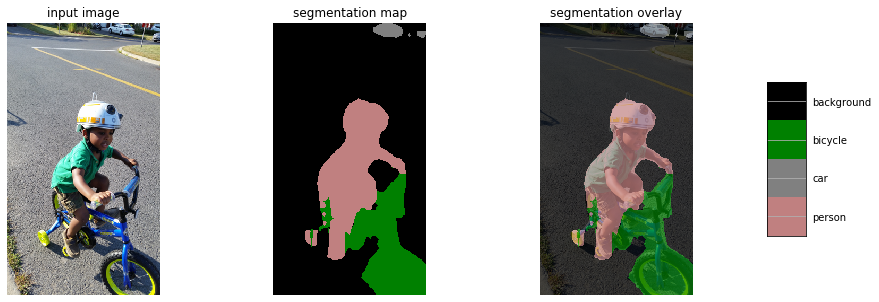

In [23]:

SAMPLE_IMAGE = 'img1.jpg'  # @param ['deeplab_image1', 'deeplab_image1', 'deeplab_image1']

def run_visualization(imgPath):
  """Inferences DeepLab model and visualizes result."""
  try:
    original_im = Image.open(imgPath)
  except IOError:
    print('Cannot retrieve image. Please check image path: ' + imgPath)
    return

  print('running deeplab on image %s...' % imgPath)
  resized_im, seg_map = MODEL.run(original_im)

  vis_segmentation(resized_im, seg_map)
  return resized_im,seg_map,original_im

resized_im, seg_map, orig_im = run_visualization(SAMPLE_IMAGE)

In [24]:
#seg_image = label_to_color_image(seg_map).astype(np.uint8)
print(resized_im.size)
print(seg_map.shape)
print(orig_im.size)

(288, 513)
(513, 288)
(320, 569)


In [25]:
import struct
def scaleImg(img, sizex, sizey):
    imgshape = img.shape
    return [[ img[int(imgshape[0] * r / sizex)][int(imgshape[1] * c / sizey)]  
             for c in range(sizey)] for r in range(sizex)]

def toLabelsSet(img):
    seg_map_shape = img.shape
    itemsFound = set()
    for i in range(seg_map_shape[0]):
        for j in range(seg_map_shape[1]):
            lbl = img[i][j]
            if(lbl>0):
                itemsFound.add(lbl)
    return itemsFound;
def saveItemsFoundToJson(itemsFound, fileName):
    firstItem = True;
    with open(fileName, 'w') as writer:
        writer.write("{")
        writer.write("\n  ClassifficationLabels:[")
        for item in itemsFound:
            if(firstItem):
                writer.write(str(item))
                firstItem = False
            else:
                writer.write(",")
                writer.write(str(item))
        writer.write("]")
        writer.write("\n}")

def saveImagePgm(file_name,mat,lgth,wdth):
    writer = open(file_name, 'wb')
    #--sauvegarde de l'entete--
    pgm_header = "P5" 
    pgm_header += "\n# IMG Module"
    pgm_header += "\n" + str(wdth) + " " + str(lgth)
    pgm_header += "\n255\n"
    writer.write(bytearray(pgm_header,'ascii'))
    grayV = np.reshape(mat, wdth * lgth )
    #
    #  Pack entries of vector into a string of bytes, replacing each integer
    #  as an unsigned 1 byte character.
    #
    grayB = struct.pack( '%sB' % len(grayV), *grayV )
    writer.write(grayB)
    writer.close()

In [26]:
#itemsFound = toLabelsSet(seg_map)
#print(itemsFound)
seg_map_orig = np.asarray(scaleImg(seg_map,orig_im.size[1],orig_im.size[0]))
itemsFound = toLabelsSet(seg_map_orig)
print(itemsFound)

{2, 15, 7}


In [27]:
#write labels found to json file
saveItemsFoundToJson(itemsFound,'labels.json')

In [28]:
#write segmented image in pgm
#saveImagePgm('imageresizesegmented.pgm',seg_map,seg_map.shape[0],seg_map.shape[1])
saveImagePgm('image_class.pgm',seg_map_orig,seg_map_orig.shape[0],seg_map_orig.shape[1])

In [29]:
seg_map_color = label_to_color_image(seg_map_orig).astype(np.uint8)
im = Image.fromarray(seg_map_color)
im.save("image_class_color.jpg")